# Supervised Classification with IRIS data set

This is an example to demonstrate supervised classification using support vector machines on the IRIS data set.

First things first, let's import the necessary modules

In [1]:
import sklearn.datasets as sk_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Now on to loading the data set and exploring its features

In [2]:
iris = sk_data.load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The DESCR attribute provides a clear description of the data set, its characteristics and the feature labels

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The 'frame' attribute in the 'iris' dictionary holds the actual data in the form of a pandas.DataFrame object - which is very useful for data analysis and visualization purposes

In [4]:
iris_df = iris.frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The pairplot function in the seaborn library is a very useful tool to visualize the relationship between the features, pairwise, all at once. The pairplot function is used to visualize which features classify the target variables effectively - for a supervised classification problem. For a regression problem, it is used to visualize the pairwise correlation relationship between the features.

Since the target variable is clearly the species type mentioned in the 'target' column of the dataframe, we use that column to add hue to the plot. 

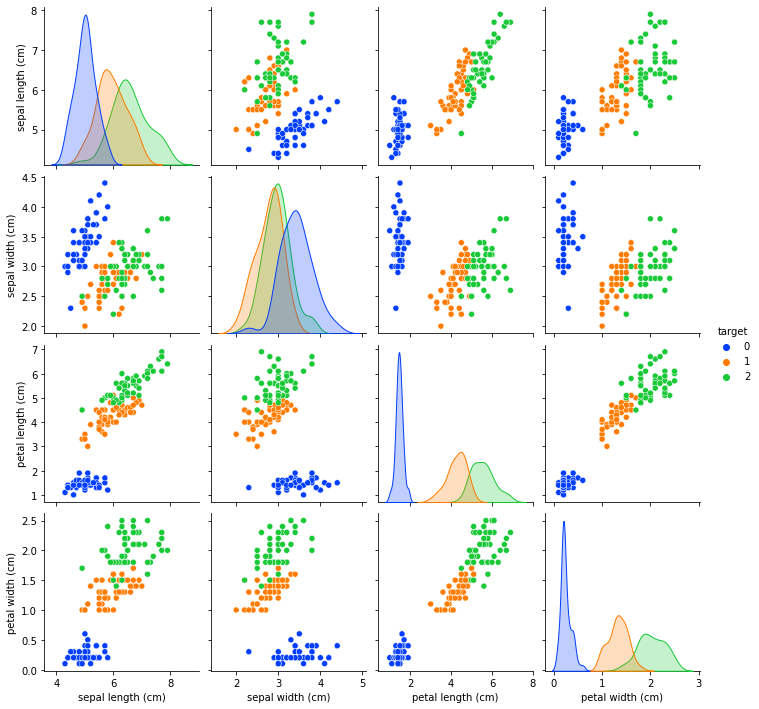

In [5]:
sns.pairplot(data=iris_df,hue='target',palette='bright')

The leading diagonal plots are relative frequency curves of features of the flower separated by their species. It looks like for the sepal features, the distributions are not well separated, and for the petal features, 0 is well sparated from 1 and 2, but 1 is not so different from 2. 

It looks like many pairwise plots actually segregate the species pretty well! At first glance, 'sepal length' vs 'sepal width' (and vice versa) plot looks like the worst segregator. I will choose 'petal width' vs 'sepal width' as my defining features for my supervised classifier 

### Classification (simplified)

To simplify things for now, let us just take the values for two Iris species - Setosa and Versicolor (0 and 1)

In [6]:
#Let us take only Setosa and Versicolor
iris_subdf = iris_df[iris_df['target'] != 2]
iris_subdf.shape

(100, 5)

Let us plot the 'sepal width' vs 'petal width' for this smaller data set

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

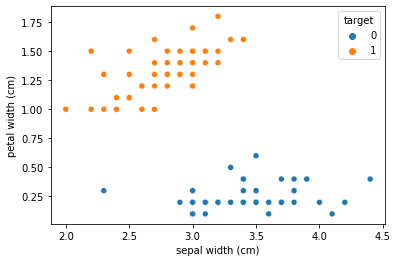

In [7]:
sns.scatterplot(data=iris_subdf,x='sepal width (cm)', y='petal width (cm)',hue='target')

Just visually it is very easy to classify the two by just observing the graph and drawing an imaginary diagonal across the graph which will act as the decision boundary. However let's get the support vector machine to do it.

In [8]:
from sklearn import svm

We now split the data into features(X) and labels(y)

In [9]:
X = np.array(iris_subdf[['sepal width (cm)','petal width (cm)']])
y = np.array(iris_subdf['target'])

svm has a function called SVC which is a support vector classifier. This classifier can do much more complicated classification methods but we will stick to linear given the context of the problem.

In [10]:
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

And the classification problem is over! 'clf' now contains all the necessary information about the features and labels provided to (hopefully) correctly classify future individuals from either species just from their sepal and petal widths! 

Let us predict the class for two fictional individuals whose feature values are given as:
<table>
    <tr>
        <th>Sepal Width (cm)</th>
        <th>Petal Width (cm)</th>
    </tr>
    <tr>
        <td>4</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>3</td>
        <td>1</td>
    </tr>
</table>    

In [11]:
clf.predict([[4,0.5]])

array([0])

In [12]:
clf.predict([[3,1]])

array([1])

A linear classifier assigns weights to the feature labels and adds a constant coefficient. 

$$
w_1 x_1 + w_2 x_2 + k 
$$

The resulting value decides the predicted classification of the individual. The decision boundary line is given by:

$$
w_1 x_1 + w_2 x_2 + k = 0
$$

Converting it to the familiar y = mx + c form (where m is the slope and c is the intercept on the y axis): 

$$
x_2 = -\frac{w_1}{w_2}x_1 -\frac{k}{w_2}
$$

Let us take a look at the coefficients predicted by our linear classifier

In [13]:
clf.coef_

array([[-0.98352957,  2.01411784]])

and the intercept

In [14]:
clf.intercept_

array([1.34635397])

Let us now plot the data values along with the classifier line. 

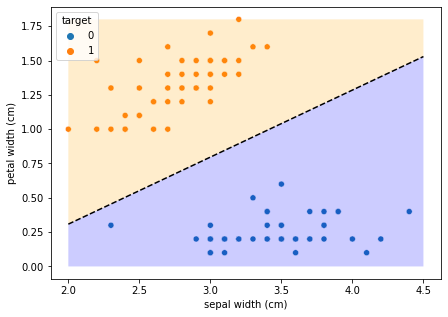

In [15]:
fig,ax = plt.subplots(figsize=(7,5),nrows=1,ncols=1)

xs = np.linspace(2,4.5,100)
slope = -clf.coef_[0,0]/clf.coef_[0,1]
intercept = -clf.intercept_[0]/clf.coef_[0,1]

sns.scatterplot(data=iris_subdf,x='sepal width (cm)', y='petal width (cm)',hue='target',ax=ax)
ys = np.array(list(map(lambda x:x*slope+intercept,xs)))
ax.plot(xs,ys,'k--')

ax.fill_between(xs,ys,0,
               facecolor='blue',
               alpha=0.2)

ax.fill_between(xs,np.ones(len(xs))*max(iris_subdf['petal width (cm)']),ys,
               facecolor='orange',
               alpha=0.2)

Looks more or less exactly like how we imagined it would be. There are infinite lines that would correctly classify the two species as effectively as this one. 

### Classification (3 target species)

We perform the same kind of analysis for the entire data set (including Virginica). Since we now have unique target values, the classifier will produce three lines of classification, one for each pair of species - one line to classify 0 and 1, one to classify 1 and 2, and one to classify 2 and 0.

In [16]:
X = iris_df[['sepal width (cm)','petal width (cm)']]
y = iris_df['target']
clf2 = svm.SVC(kernel='linear')
clf2.fit(X,y)

SVC(kernel='linear')

Here are the coefficients and intercepts for the three lines.

In [17]:
clf2.coef_

array([[ 0.98352957, -2.01411784],
       [ 0.45917166, -1.85798802],
       [ 0.64544215, -3.87092105]])

In [18]:
clf2.intercept_

array([-1.34635397,  0.50130194,  4.54756508])

Let's now plot the data along with the classifier lines

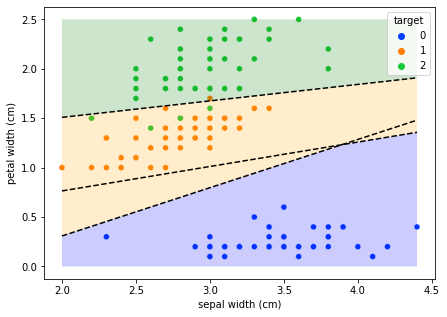

In [19]:
fig,ax = plt.subplots(figsize=(7,5),nrows=1,ncols=1)
sns.scatterplot(data=iris_df,x='sepal width (cm)', y='petal width (cm)',hue='target',ax=ax,palette='bright')
xs = np.linspace(min(X['sepal width (cm)']),max(X['sepal width (cm)']),100)
slope = -clf2.coef_[:,0]/clf2.coef_[:,1]
intercept = -clf2.intercept_[:]/clf2.coef_[:,1]
ys = np.array(list(map(lambda x:x*slope+intercept,xs)))
ax.plot(xs,ys,'k--')

ax.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),0,
               facecolor='blue',
               alpha=0.2)

ax.fill_between(xs,np.ones(len(xs))*max(iris_df['petal width (cm)']),np.maximum(ys[:,1],ys[:,2]),
                facecolor='green',
                alpha = 0.2)

ax.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),np.maximum(ys[:,1],ys[:,2]),
               facecolor='orange',
               alpha=0.2)

<ul>
    <li>The top-most doundary classifies species 1 and 2</li>
    <li>The bottom-most boundary (identical to the two species classifier), classifies 0 and 1, and,</li>
    <li>The middle boundary classifies 0 and 2 (which, coincidentally, could also classify 0 and 1, with the same accuracy)</li>
</ul>   


### Real-world Supervised Classification Problem (with Test-Train split)

Usually, when data like the iris data set is given to classify, the data set is randomly split into two unequal sets - the larger one to train the classifier model (called training data) and the smaller, which the classifier has never come across during the training phase (called test data), to calculate the accuracy of the model. The accuracy of the model is calculated by comparing the predicted labels with the actual labels provided in the initial data set. 

Let us do an 80:20 train-test split and take a stratified sample of each species - (40:40:40 - train and 10:10:10 - test)

In [20]:
np.random.seed(42)

n_train = int(0.8*len(iris_df)/3)

iris_0 = iris_df[iris_df['target'] == 0].sample(frac=1)
iris_1 = iris_df[iris_df['target'] == 1].sample(frac=1)
iris_2 = iris_df[iris_df['target'] == 2].sample(frac=1)

train = (pd.concat([iris_0.iloc[:n_train],iris_1.iloc[:n_train],iris_2.iloc[:n_train]])).sample(frac=1)
test = (pd.concat([iris_0.iloc[n_train:],iris_1.iloc[n_train:],iris_2.iloc[n_train:]])).sample(frac=1)

iris_rand = pd.concat([train,test])

test.shape

(30, 5)

After the split, we need to make sure that all possible target values are represented in both training as well as test data sets. For data sets such as iris where all the species are equally represented (50:50:50), this is not a huge problem, given the test and training data sets are large enough. It is good practice, nonetheless, to verify this.

In [21]:
iris_rand.groupby('target')['sepal length (cm)'].count()

target
0    50
1    50
2    50
Name: sepal length (cm), dtype: int64

In [22]:
train['target'].unique()

array([0, 2, 1])

In [23]:
train.groupby('target')['sepal length (cm)'].count()

target
0    40
1    40
2    40
Name: sepal length (cm), dtype: int64

In [24]:
test['target'].unique()

array([0, 2, 1])

In [25]:
test.groupby('target')['sepal length (cm)'].count()

target
0    10
1    10
2    10
Name: sepal length (cm), dtype: int64

We now drop the 'target' column from the test data and store it else where

In [26]:
actual = np.array(test['target'])
test.drop('target',inplace=True,axis=1)
test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Time to define and train the classifier model using the training data

In [27]:
X = train[['sepal width (cm)','petal width (cm)']]
y = train['target']
clf3 = svm.SVC(kernel='linear')
clf3.fit(X,y)

SVC(kernel='linear')

Now let's get the model to predict the species for all individuals in the test data set

In [28]:
predictions = clf2.predict(np.array(test[['sepal width (cm)','petal width (cm)']]))
test['predictions'] = predictions

Time to plot 

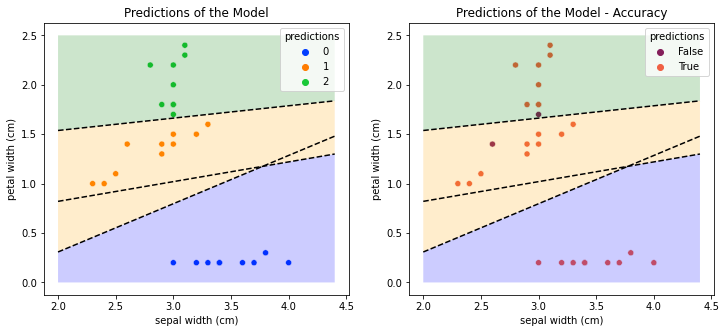

In [29]:
xs = np.linspace(min(X['sepal width (cm)']),max(X['sepal width (cm)']),100)
slope = -clf3.coef_[:,0]/clf3.coef_[:,1]
intercept = -clf3.intercept_[:]/clf3.coef_[:,1]
ys = np.array(list(map(lambda x:x*slope+intercept,xs)))

fig,[ax1,ax2] = plt.subplots(figsize=(12,5),nrows=1,ncols=2)

ax1.set_title('Predictions of the Model')
sns.scatterplot(data=test,x='sepal width (cm)', y='petal width (cm)',
                hue='predictions',ax=ax1,palette='bright')
ax1.plot(xs,ys,'k--')

ax1.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),0,
               facecolor='blue',
               alpha=0.2)

ax1.fill_between(xs,np.ones(len(xs))*max(iris_df['petal width (cm)']),np.maximum(ys[:,1],ys[:,2]),
                facecolor='green',
                alpha = 0.2)

ax1.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),np.maximum(ys[:,1],ys[:,2]),
               facecolor='orange',
               alpha=0.2)


ax2.set_title('Predictions of the Model - Accuracy')
sns.scatterplot(data=test,x='sepal width (cm)', y='petal width (cm)',
                hue=(test['predictions'] == actual),ax=ax2,palette='rocket')
ax2.plot(xs,ys,'k--')

ax2.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),0,
               facecolor='blue',
               alpha=0.2)

ax2.fill_between(xs,np.ones(len(xs))*max(iris_df['petal width (cm)']),np.maximum(ys[:,1],ys[:,2]),
                facecolor='green',
                alpha = 0.2)

ax2.fill_between(xs,np.minimum(ys[:,0],ys[:,1]),np.maximum(ys[:,1],ys[:,2]),
               facecolor='orange',
               alpha=0.2)

The boundaries are no longer identical to the previous case because the classification here is performed with only a fraction of the data. Let's find the misclassified individuals

In [30]:
temp = test.copy()
temp['actual'] = actual
errors = temp[temp['predictions'] != temp['actual']]
errors

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predictions,actual
134,6.1,2.6,5.6,1.4,1,2
77,6.7,3.0,5.0,1.7,2,1


The confusion matrix for this classification model can be generated 

In [31]:
model_table = pd.DataFrame(index=['Actual 0','Actual 1','Actual 2'],
                          columns=['Predicted 0','Predicted 1','Predicted 2'],
                          data=[
                              [
                                  temp[(temp['actual']==0)&(temp['predictions']==0)].count().iloc[0],
                                  temp[(temp['actual']==0)&(temp['predictions']==1)].count().iloc[0],
                                  temp[(temp['actual']==0)&(temp['predictions']==2)].count().iloc[0]
                              ],
                              [
                                  temp[(temp['actual']==1)&(temp['predictions']==0)].count().iloc[0],
                                  temp[(temp['actual']==1)&(temp['predictions']==1)].count().iloc[0],
                                  temp[(temp['actual']==1)&(temp['predictions']==2)].count().iloc[0],
                              ],
                              [
                                  temp[(temp['actual']==2)&(temp['predictions']==0)].count().iloc[0],
                                  temp[(temp['actual']==2)&(temp['predictions']==1)].count().iloc[0],
                                  temp[(temp['actual']==2)&(temp['predictions']==2)].count().iloc[0]
                              ]
                          ]
                        )
model_table

,Predicted 0,Predicted 1,Predicted 2
Actual 0,10,0,0
Actual 1,0,9,1
Actual 2,0,1,9


The train:test ratio could be adjusted to see the variation in decision boundaries and hence the overall accuracy of the classification model. 